<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Необходимо защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Защитить данные нужно таким способом, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
try:
    insurance = pd.read_csv('/datasets/insurance.csv')
except:
    insurance = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [3]:
insurance.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Таблица содержит 5 колонок данных о клиентах; данные имеют тип int64 и float64.

Описание данных:

- **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
- **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.


In [5]:
insurance = insurance.rename(columns={'Пол': 'gender', 'Возраст': 'age', 'Зарплата': 'income', 
                            'Члены семьи': 'family','Страховые выплаты': 'insurance_payments'})

In [6]:
insurance['gender'].unique()

array([1, 0])

In [7]:
insurance['age'].unique()

array([41., 46., 29., 21., 28., 43., 39., 25., 36., 32., 38., 23., 40.,
       34., 26., 42., 27., 33., 47., 30., 19., 31., 22., 20., 24., 18.,
       37., 48., 45., 44., 52., 49., 35., 56., 65., 55., 57., 54., 50.,
       53., 51., 58., 59., 60., 61., 62.])

In [8]:
insurance['age'] = insurance['age'].astype(int)

In [9]:
insurance['income'].unique()

array([49600., 38000., 21000., 41700., 26100., 41000., 39700., 38600.,
       49700., 51700., 36600., 29300., 39500., 55000., 43700., 23300.,
       48900., 33200., 36900., 43500., 36100., 26600., 48700., 40400.,
       38400., 34600., 34800., 36800., 42200., 46300., 30300., 51000.,
       28100., 64800., 30400., 45300., 38300., 49500., 19400., 40200.,
       31700., 69200., 33100., 31600., 34500., 38700., 39600., 42400.,
       34900., 30500., 24200., 49900., 14300., 47000., 44800., 43800.,
       42700., 35400., 57200., 29600., 37400., 48100., 33700., 61800.,
       39400., 15600., 52600., 37600., 52500., 32700., 51600., 60900.,
       41800., 47400., 26500., 45900., 35700., 34300., 26700., 25700.,
       33300., 31100., 31500., 42100., 37300., 42500., 27300., 46800.,
       33500., 44300., 41600., 53900., 40100., 44600., 45000., 32000.,
       38200., 33000., 38500., 51800., 33800., 46400., 43200., 31800.,
       50200., 35100., 30700., 45800., 49300., 42800., 33600., 50300.,
      

In [10]:
insurance['income'] = insurance['income'].astype(int)

In [11]:
insurance['insurance_payments'].unique()

array([0, 1, 2, 3, 5, 4])

In [12]:
insurance.isna().sum()

gender                0
age                   0
income                0
family                0
insurance_payments    0
dtype: int64

In [13]:
insurance.duplicated().sum()

153

In [14]:
insurance = insurance.drop_duplicates().reset_index(drop=True)

In [15]:
insurance.duplicated().sum()

0

In [16]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4847.0,0.498453,0.500049,0.0,0.0,0.0,1.0,1.0
age,4847.0,31.023932,8.487995,18.0,24.0,30.0,37.0,65.0
income,4847.0,39895.811223,9972.952441,5300.0,33200.0,40200.0,46600.0,79000.0
family,4847.0,1.203425,1.098664,0.0,0.0,1.0,2.0,6.0
insurance_payments,4847.0,0.152259,0.468934,0.0,0.0,0.0,0.0,5.0


<AxesSubplot:>

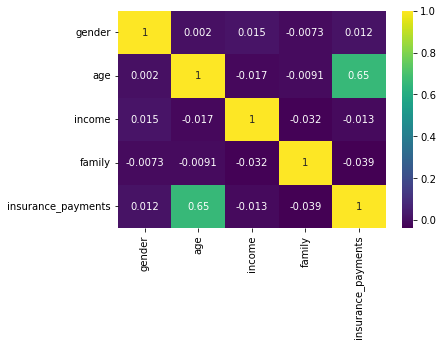

In [17]:
sns.heatmap(insurance.corr(), annot=True, cmap = 'viridis')

До 75% клиентов составляют люди не старше 37лет и зарплатой до 46600р. При этом. никому из них не выплачивалась страховка. Наибольшая корреляция 0,65 у з/п и возраста, по остальным признакам она отсутствует.

Итак, в представленных данных пропусков нет, были удалены дубликаты. Столбцы с признаками переименованы в соответствии со змеиным регистром. Так же колонки с данными о зарплате и возрасте преобразованы в целочисленные.


## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$


Признаки умножают на обратимую матрицу. 
Изменится ли качество линейной регрессии? (Её можно обучить заново.)


**Ответ:** Предположим, что качество линейной регрессии не изменится, если домножить вектор $Х$ на некоторую обратимую матрицу $Р$.

**Обоснование:** 

Заменим вектор $Х$ на произведение $ M = ХР $. Получим:
$$ w_1 = (M^T M)^{-1} (M)^T y $$

$ (АВ)^T = B^T A^T$  и $(AB)^{−1}=B^{−1} A^{−1} $. Если $a_1 = M w_1$, заменив $М$, получим: 

$$ a_1 = XP ((XP)^T XP)^{-1} (XP)^T y = XP (P^T X^T XP)^{-1} P^T X^T y $$

$$ a_1 = XP P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$$
Если $ (P^T)^{-1} P^T = E^T = E $, тогда: $$ a_1 = X E (X^T X)^{-1} E X^T y = X (X^T X)^{-1} X^T y = Xw = a $$.

Значит, качество линейной регрессии не изменится, если домножить вектор $Х$ на некоторую обратимую матрицу $Р$.

## Алгоритм преобразования


**Алгоритм**

Итак, зная, что качество линейной регрессии не изменится, если домножить вектор $X$ на некоторую обратимую матрицу $Р$:
* создадим случайную матрицу $Р$, которая была бы обратимой и квадратной
* зададим ее размерность $(nxn)$, где $n$ - число столбцов в $X$
* умножим ее на вектор признаков $X$, чтобы тем самым защитить данные клиентов страховой компании «Хоть потоп»
* проверим работу алгоритма линейной регресии до и после преобразований.

**Обоснование**

In [18]:
features = insurance.drop(['insurance_payments'], axis= 1)
target = insurance['insurance_payments']

In [19]:
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
y = target
w = (np.linalg.inv(X.T @ X) @(X.T)).dot(y)

In [20]:
# размерность матрицы P
n = X.shape[1]
n

5

In [21]:
np.random.seed(111)
P = np.random.randint(1000, size=(n,n))
P

array([[852, 876, 980, 724,  86],
       [275, 681, 322, 118, 978],
       [808, 967, 953,   7, 268],
       [266, 449, 880, 728, 284],
       [270, 418,  21, 566, 712]])

In [22]:
P_det = np.linalg.det(P)
P_det

17321221363805.977

In [23]:
P_1 = np.linalg.inv(P)
P_1

array([[-0.01462653, -0.01535535,  0.01514525,  0.0051452 ,  0.01510568],
       [ 0.0198805 ,  0.01903244, -0.0185564 , -0.00857519, -0.01813901],
       [-0.00546338, -0.00442935,  0.00498321,  0.00336054,  0.0035279 ],
       [ 0.0029185 ,  0.00183032, -0.00299285, -0.00064335, -0.00148349],
       [-0.00828374, -0.00667494,  0.00738296,  0.00349549,  0.00740048]])

Как мы видим, матрица $P$ невырожденная и для нее существует обратная. Значит $P$-обратима. Пусть $M = XP$, вычислим $M$:

In [24]:
M = X @ P
M

array([[13228125., 22312022., 43688396., 36110495., 14099164.],
       [10146290., 17107776., 33484839., 27665612., 10805126.],
       [ 5610284.,  9457919., 18508617., 15288927.,  5971858.],
       ...,
       [ 9034952., 15242152., 29852082., 24681196.,  9634470.],
       [ 8717913., 14706385., 28798331., 23808294.,  9295896.],
       [10823621., 18258451., 35756007., 29558404., 11539680.]])

In [25]:
X.shape == M.shape

True

Таким образом, размерность новой матрицы совпадает с размерностью исходных данных. Кроме того, по значениям матрицы $M$ невозможно определить какими были исходные значения, не зная $P$.

## Проверка алгоритма

In [26]:
def spliting(features, target):
    features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=258)
    return features_train, features_test, target_train, target_test
def scalaring(features, target):
    features_train, features_test, target_train, target_test = spliting(features, target)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    return features_train, features_test, target_train, target_test
def fit_predict(features, target):
    features_train, features_test, target_train, target_test = scalaring(features, target)
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_test= model.predict(features_test)
    r2 = r2_score(target_test, predicted_test)
    print(f'Ошибка модели: {r2}')
    return r2


Найдем ошибку предсказаний для модели с исходными данными.

In [27]:
r2_linreg_x = fit_predict(features, target)

Ошибка модели: 0.42745663230771747


Найдем ошибку предсказаний для модели с закодированным массивом признаков, который имеет следующий вид:

In [28]:
features_m = M[:, 1:]

In [29]:
r2_linreg_m = fit_predict(features_m, target)

Ошибка модели: 0.42745663230769704


Ошибки моделей практически идентичны, а это значит, что при кодировании данных умножением на некую матрицу, модель Линейной регрессии дает прогноз c той же точностью.

**Вывод**

Было доказано, что качество линейной регрессии не изменится, если домножить вектор $Х$ на некоторую обратимую матрицу $Р$. Значит, закодировав данные клиентов страховой компании путем использования невырожденной матрицы $Р$ со случайными числами, мы получим предсказания для модели Линейной регрессии с одинаковой ошибкой. В данном примере ошибка *r2* 0.42745663.
